In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import pydot
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model

Sequential API

In [2]:
def sequential_model_building():
  seq_model=tf.keras.Sequential([
                                 tf.keras.layers.Flatten(input_shape=(28, 28)),
                                 tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return seq_model

Functional API

In [3]:
def functional_model_building():
  input_layer=tf.keras.Input(shape=(28,28))
  x=tf.keras.layers.Flatten()(input_layer)
  x=tf.keras.layers.Dense(128,activation=tf.nn.relu)(x)
  output_layer=tf.keras.layers.Dense(10,activation=tf.nn.softmax)(x)
  func_model=Model(inputs=input_layer,outputs=output_layer)
  return func_model

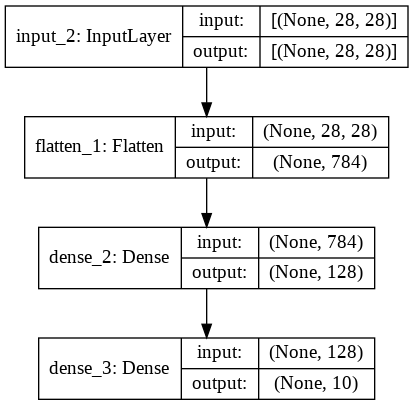

In [5]:
model1=functional_model_building()
plot_model(model1, show_shapes=True, show_layer_names=True, to_file='model_func.png')

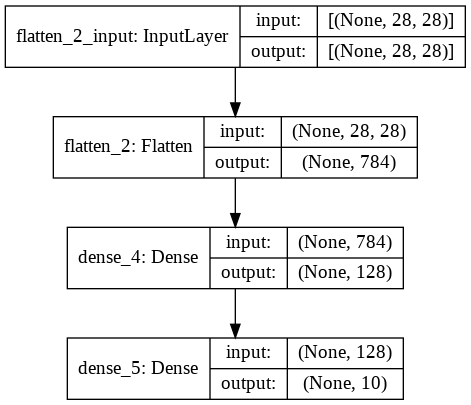

In [6]:
model2=sequential_model_building()
plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model_seq.png')

Functional Training

In [7]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model1.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(training_images, training_labels, epochs=5)
model1.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5026 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3804 - accuracy: 0.8619
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3405 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8838
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8702


[0.3603999614715576, 0.870199978351593]

Sequential Training

In [8]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model2.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(training_images, training_labels, epochs=5)
model2.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5033 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8844
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3622 - accuracy: 0.8708


[0.3622129261493683, 0.8708000183105469]